Visualization of the memray memory profiling of tab err

In [ ]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import json

Load Data

In [12]:
with open('numeric_mem_result.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data)

df.head()

,mechanism,type,rate,nrow,ncol,runnumber,runnnumber,filepath,total_memory
0,EAR,AddDelta,0.25,1000,8,85,85,/results/memory_profiling_tab_err/numeric/EAR-...,403.914KB
1,ECAR,WrongUnitScale10,0.25,100,4,17,17,/results/memory_profiling_tab_err/numeric/ECAR...,9.375KB
2,ENAR,WrongUnitScale10,0.50,1000000,10,28,28,/results/memory_profiling_tab_err/numeric/ENAR...,320.379MB
3,ENAR,AddDelta,0.90,10000,2,10,10,/results/memory_profiling_tab_err/numeric/ENAR...,2.782MB
4,ECAR,Outlier,0.10,1000,2,4,4,/results/memory_profiling_tab_err/numeric/ECAR...,153.151KB


Process

In [ ]:
# Convert total_memory to float MB
def parse_memory(mem_str):
    match = re.match(r"([0-9.]+)([KMG]?B)", mem_str.strip())
    if not match:
        return None
    value, unit = match.groups()
    value = float(value)
    unit = unit.upper()
    if unit == "B":
        return value / 1_000_000
    elif unit == "KB":
        return value / 1_000
    elif unit == "MB":
        return value
    elif unit == "GB":
        return value * 1_000
    else:
        return None

df["total_memory_MB"] = df["total_memory"].apply(parse_memory)

# Drop original if you want
df.drop(columns=["total_memory"], inplace=True)

Graphics

# Boxplots (2D visualizations)

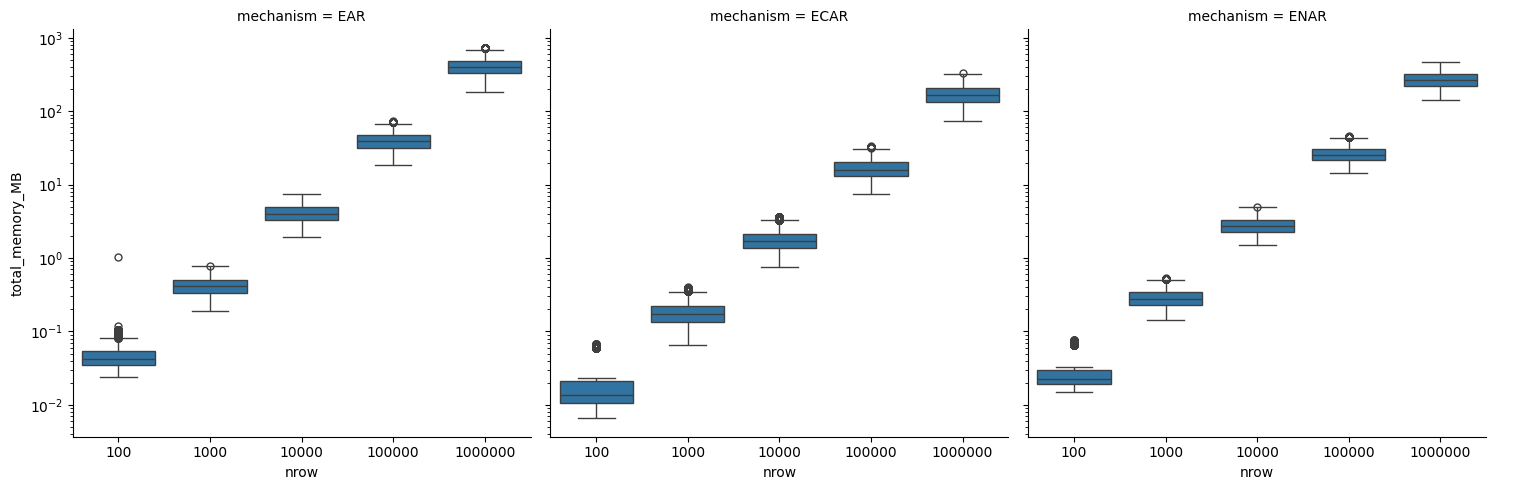

In [23]:
# Total memory allocated in the low level API aggregated across error rates, types (numeric), and ncol
# Plotted by mech
g = sns.catplot(df, x="nrow", y="total_memory_MB", col="mechanism", kind='box')
for ax in g.axes.flat:
    ax.set_yscale('log')

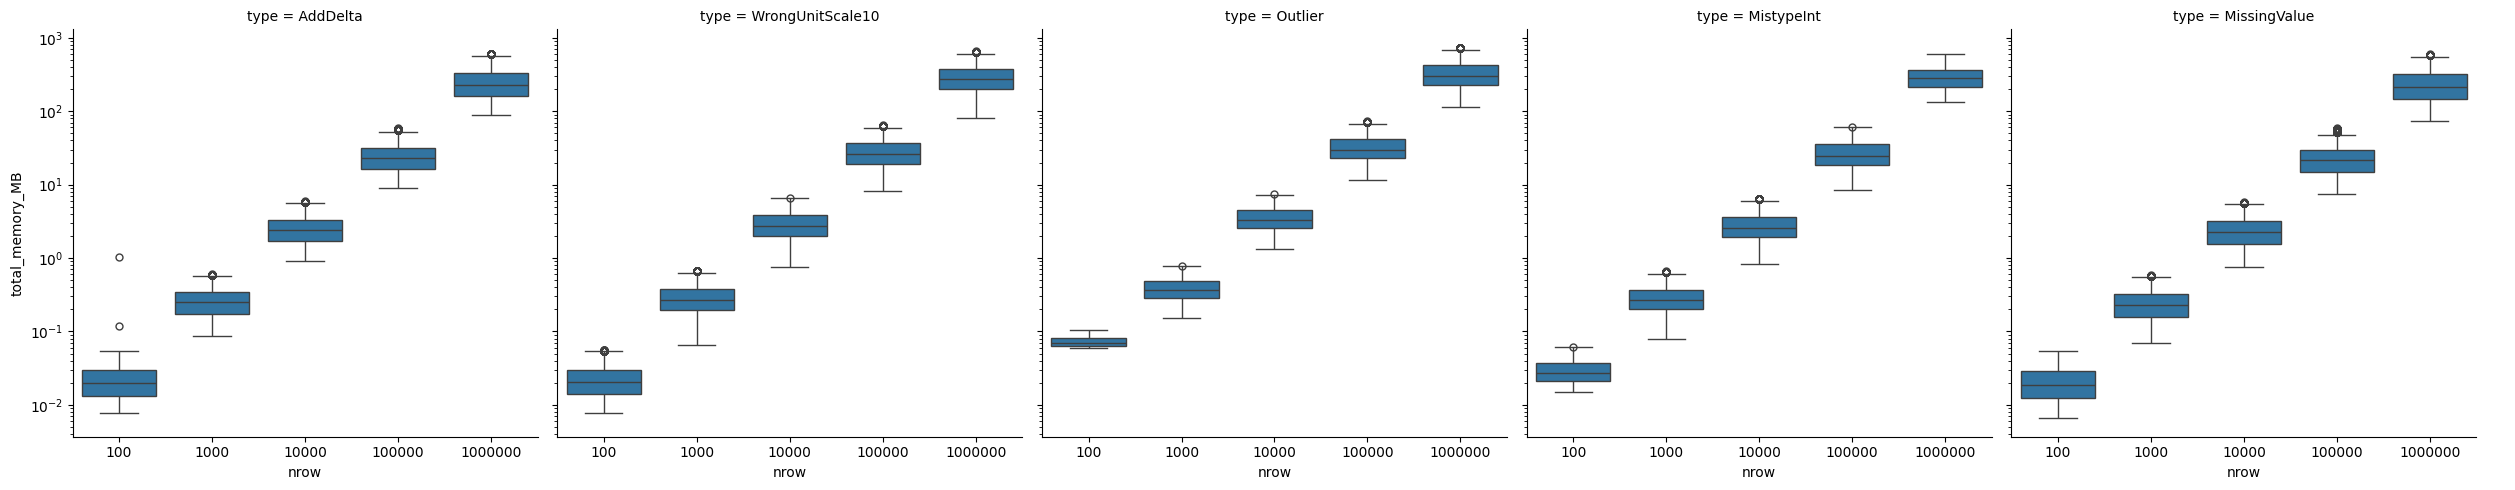

In [29]:
# By type
g = sns.catplot(df, x="nrow", y="total_memory_MB", col="type", kind='box')
for ax in g.axes.flat:
    ax.set_yscale('log')

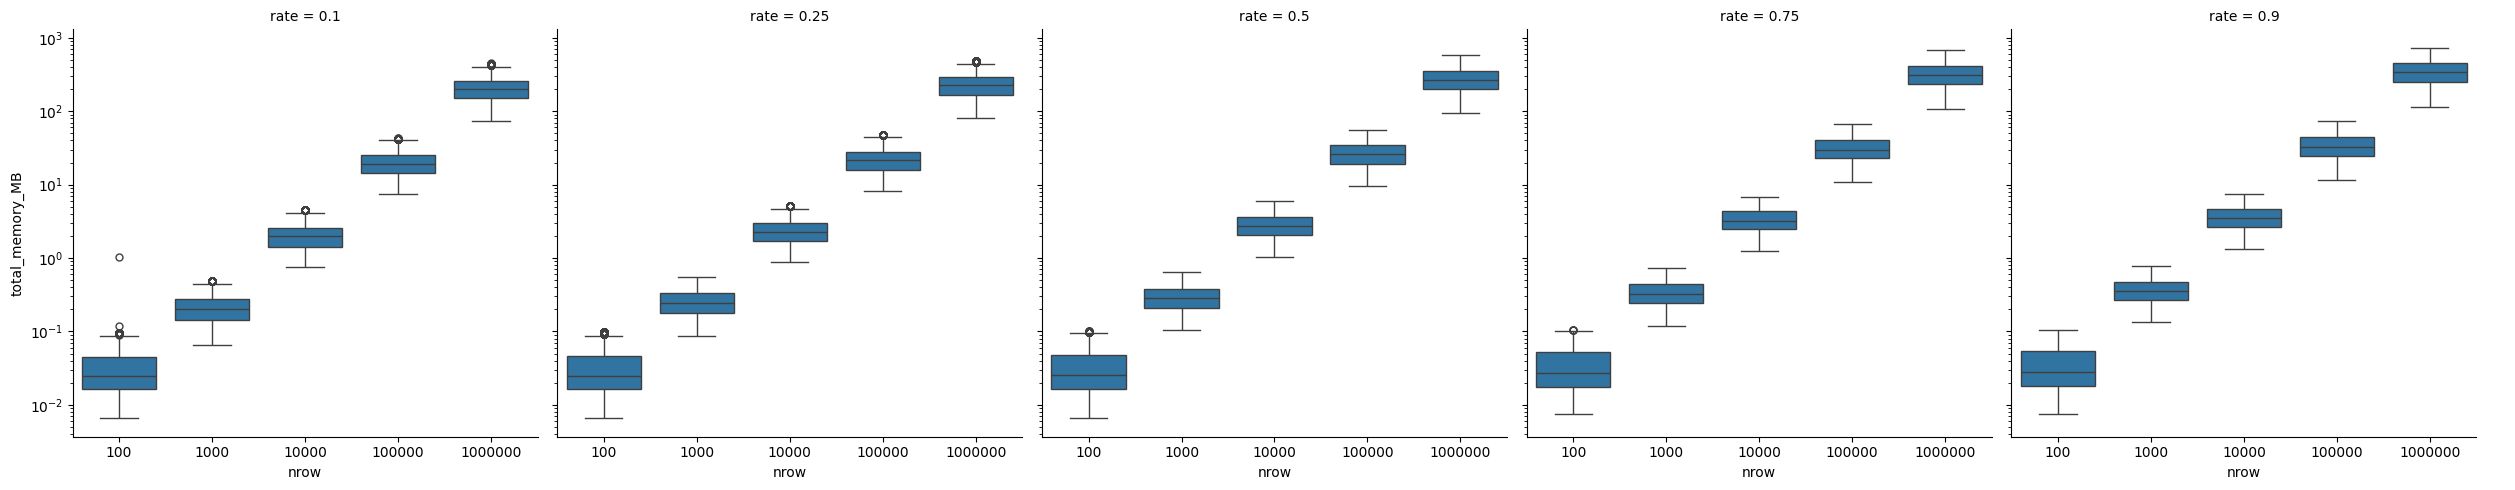

In [27]:
# By rate
g = sns.catplot(df, x="nrow", y="total_memory_MB", col="rate", kind='box')
for ax in g.axes.flat:
    ax.set_yscale('log')

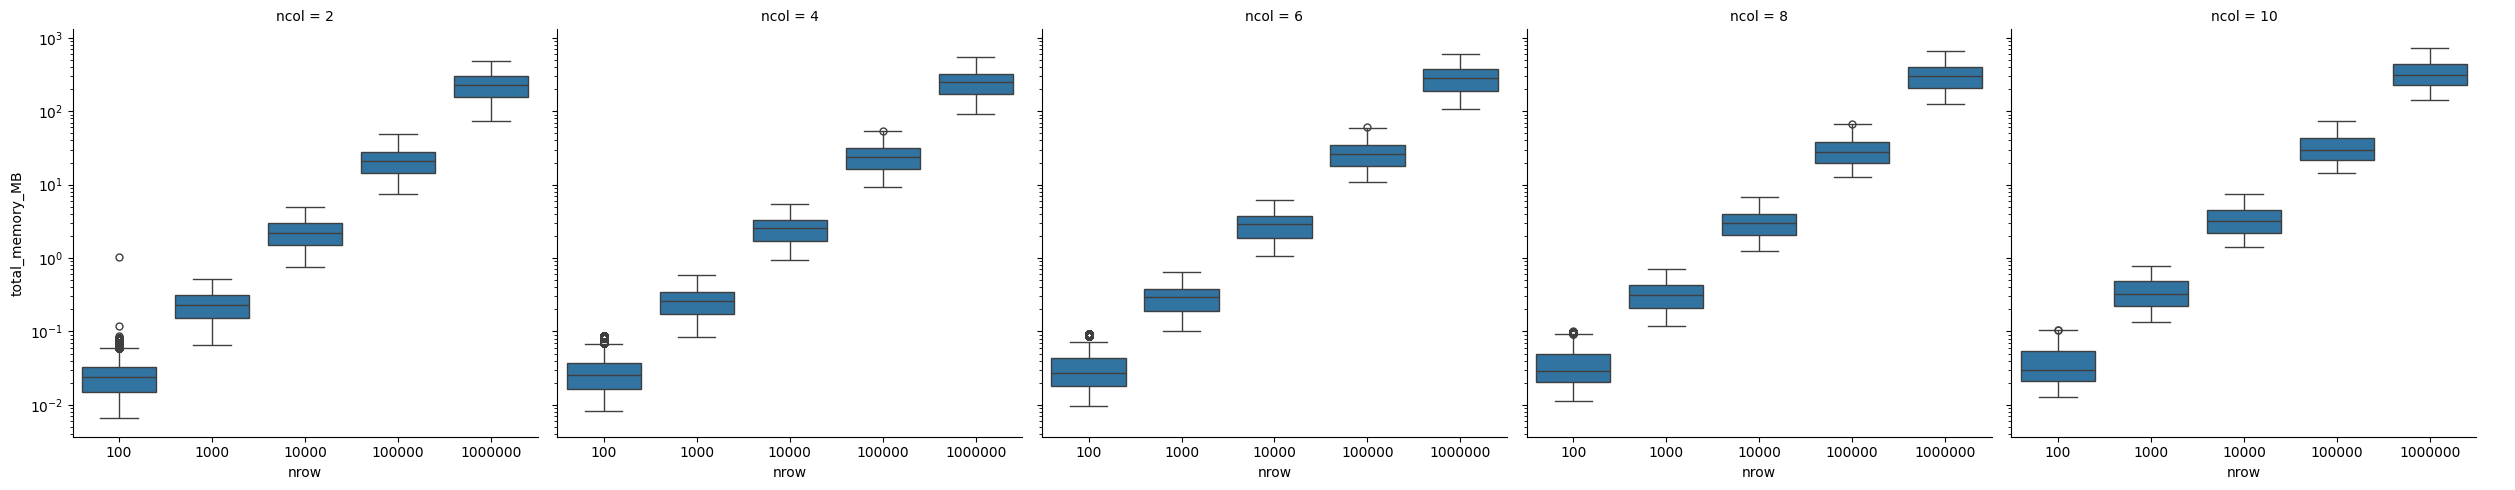

In [26]:
# By ncol
g = sns.catplot(df, x="nrow", y="total_memory_MB", col="ncol", kind='box')
for ax in g.axes.flat:
    ax.set_yscale('log')

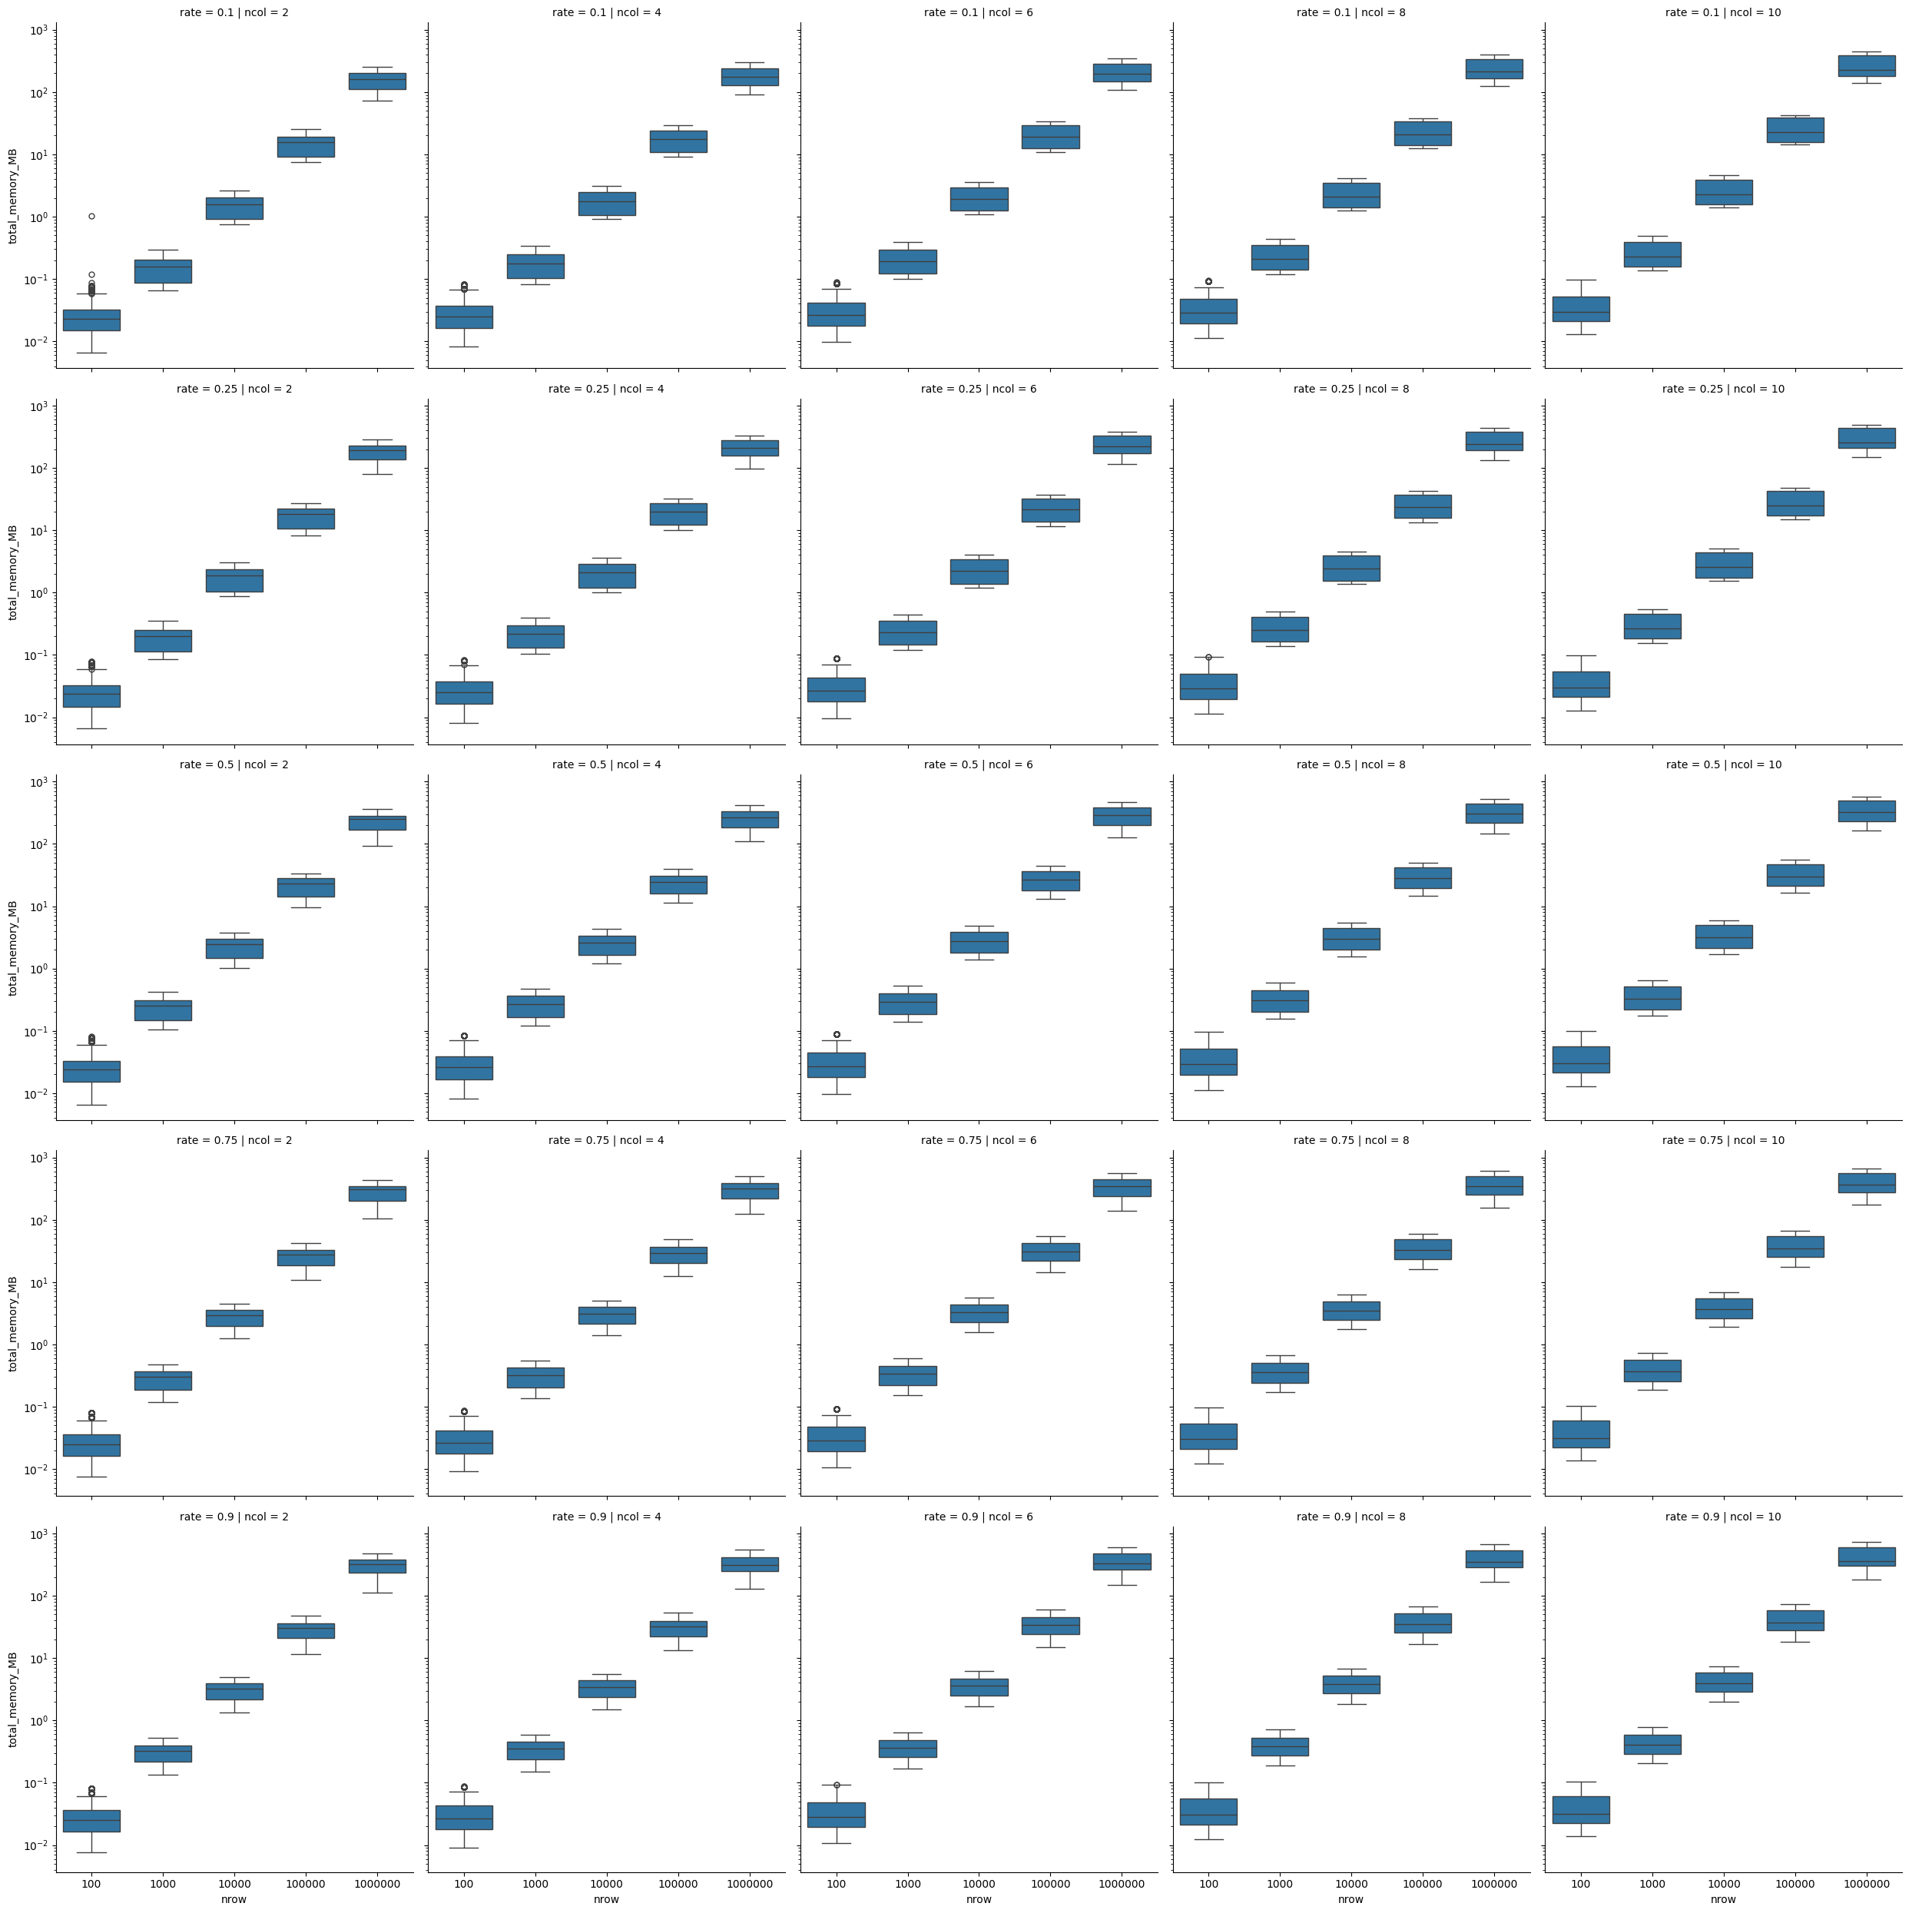

In [25]:
g = sns.catplot(df, x="nrow", y="total_memory_MB", col="ncol", row="rate", kind='box')
for ax in g.axes.flat:
    ax.set_yscale('log')

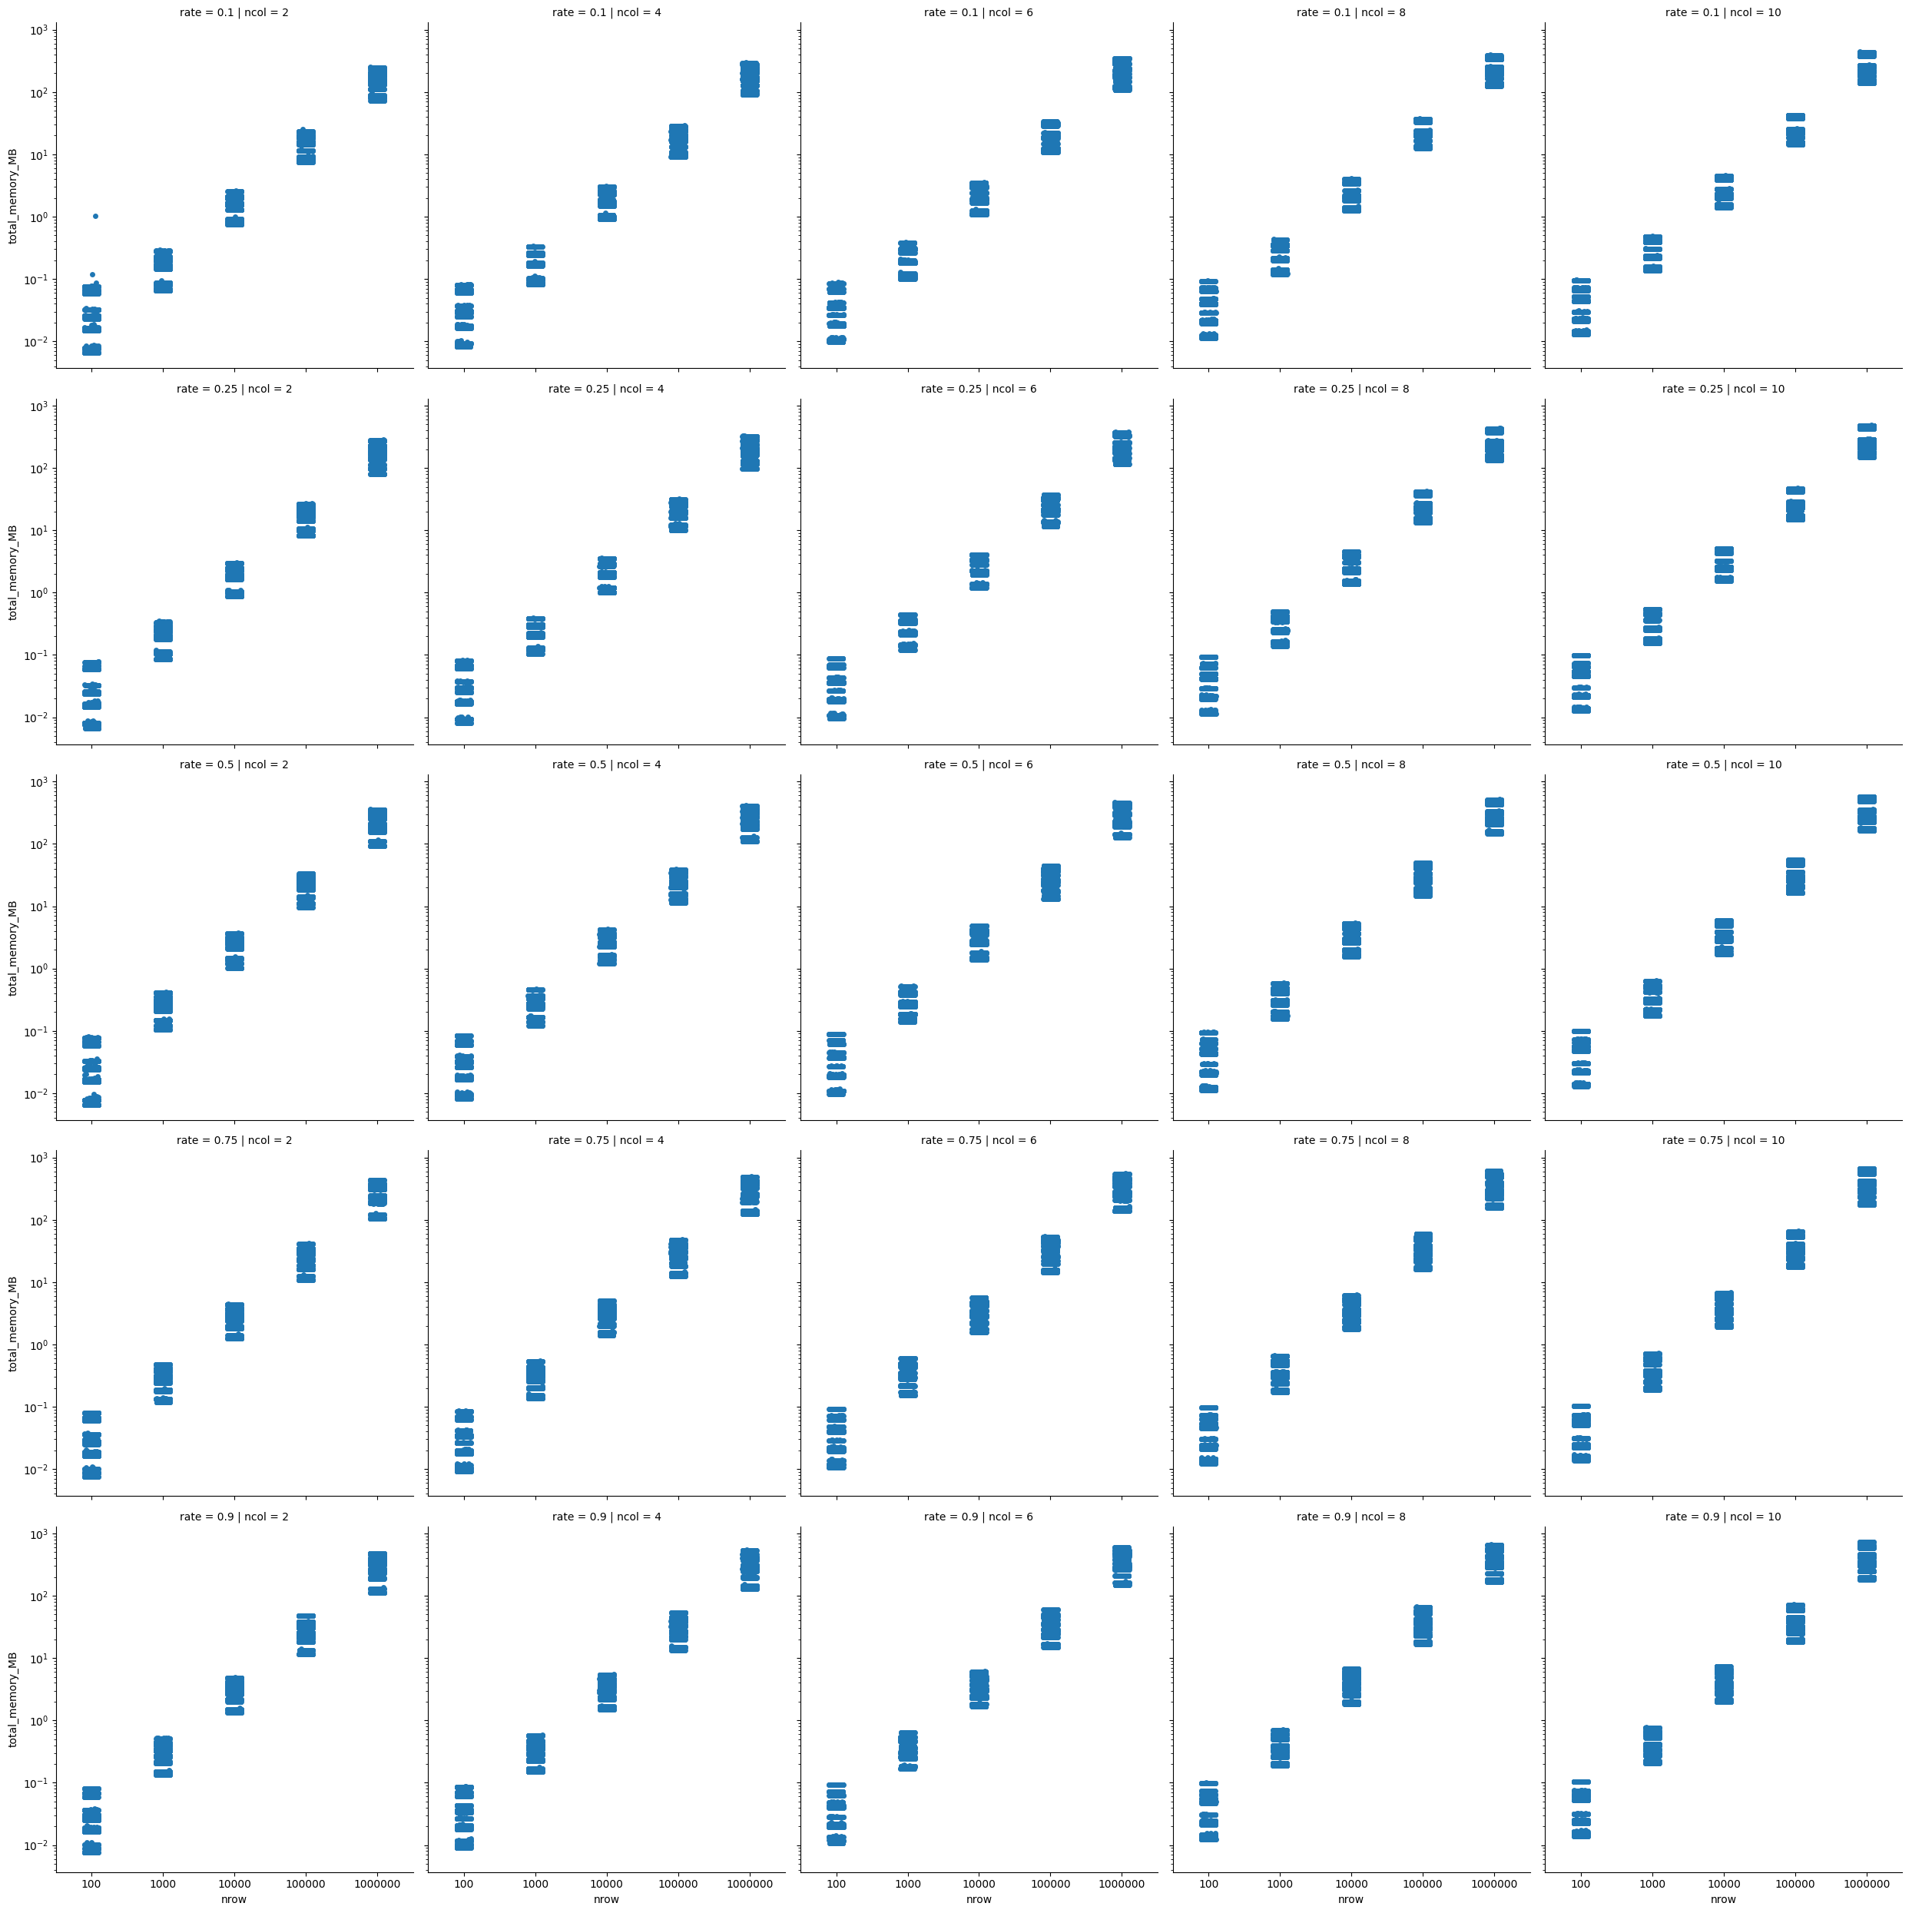

In [24]:
g = sns.catplot(df, x="nrow", y="total_memory_MB", col="ncol", row="rate")
# Set log scale for all axes
for ax in g.axes.flat:
    ax.set_yscale('log')
